# Final Project

# Nobel Prize Winners: 1901-2020

# Group Number: 57

### Presented by: 
 

<a id='section1'></a>

<h1 style="background-color: #FFFFFF; color: #0046d6; border-radius: 10px; text-align: center; padding-top: 10px; padding-bottom: 10px; font-family: 'Arial';">
    <img src="https://github.com/Shirelmaleh/new_project/raw/main/photo%20prix%20nobel.jpg" width="70%" height="20%" alt="Centered Image" />
</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
url = "https://github.com/Shirelmaleh/new_project/raw/main/nobel_prize_by_winner.csv"

try:
    nobel_df = pd.read_csv(url)
except pd.errors.ParserError:
    print("Error reading CSV file. Trying alternative method...")

In [3]:
nobel_df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [4]:
nobel_df.shape

(972, 20)

In [5]:
type(nobel_df)

pandas.core.frame.DataFrame

In [6]:
nobel_df.columns

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

## Analyse by gender 

In [7]:
nobel_df['gender'].unique()

array(['female', 'male', 'org'], dtype=object)

In [8]:
women_count=nobel_df['gender'].str.count("female").sum()
men_count=nobel_df['gender'].str.count("male").sum()
print("number of women :",women_count)
print("number of men :",men_count)

number of women : 50
number of men : 946


In [9]:
filter_gender=nobel_df.loc[(nobel_df['gender']=="male")|(nobel_df['gender']=="female")]

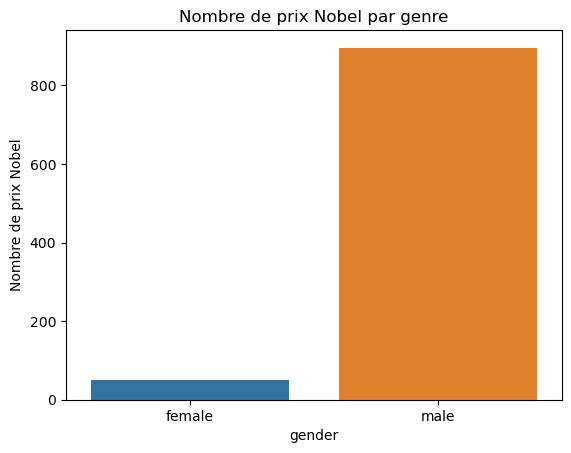

In [10]:
filter_gender = nobel_df[(nobel_df['gender'] == 'male') | (nobel_df['gender'] == 'female')]
sns.countplot(data=filter_gender, x='gender')
plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel par genre')
plt.show()

on voit que y'a une majorite de male 

# The link between Category & Man/Woman

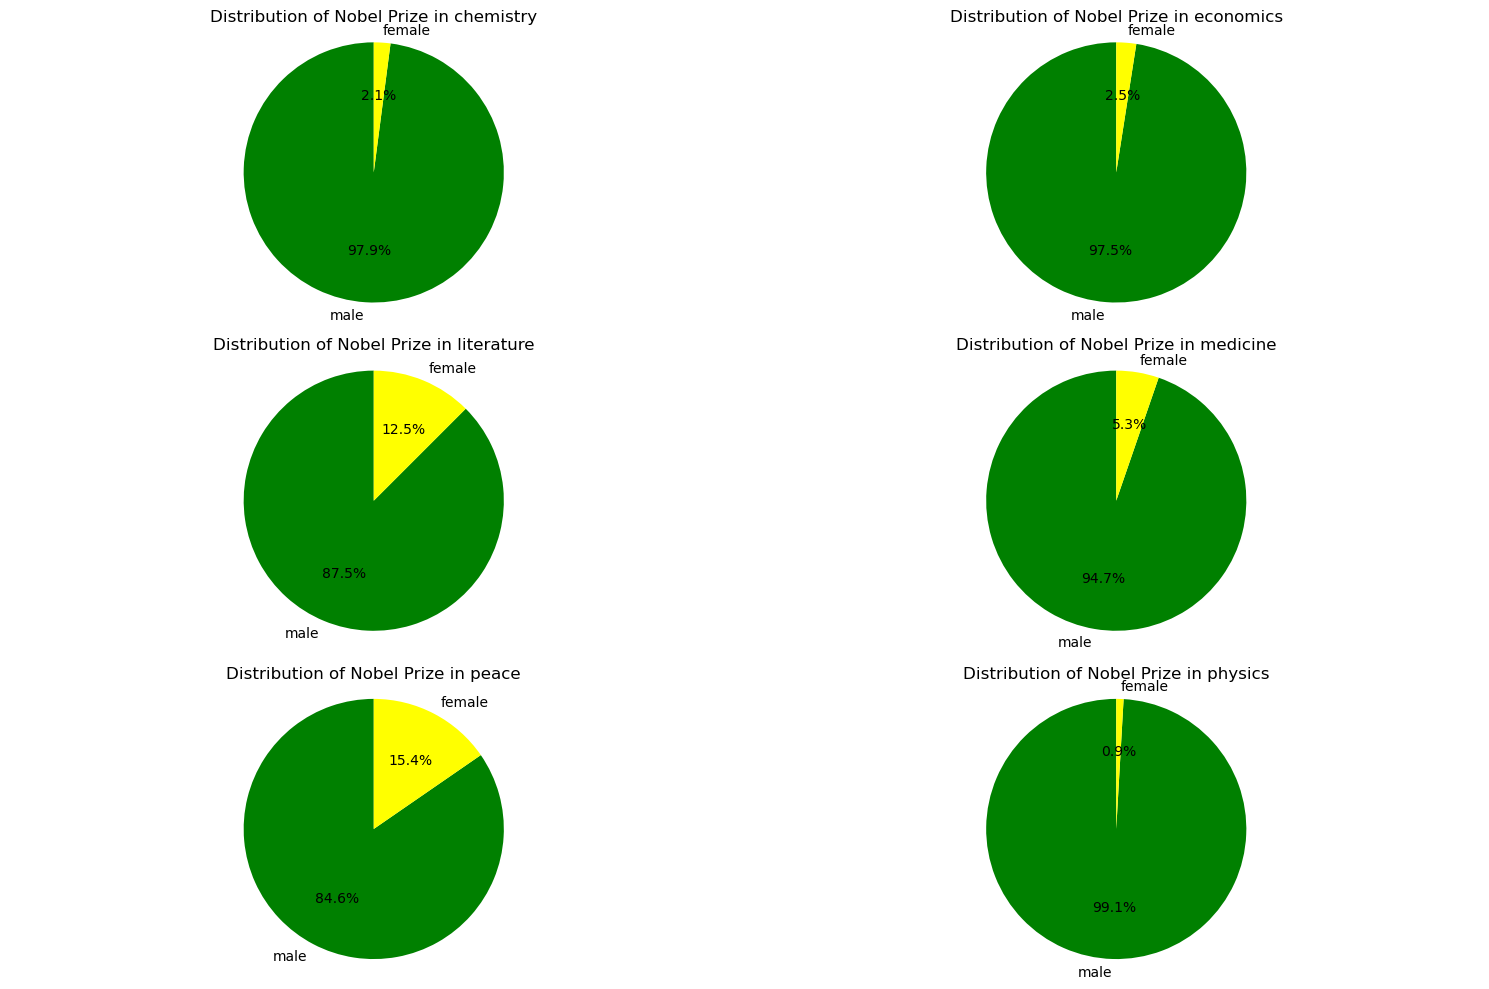

In [11]:
nobel_counts = nobel_df.groupby(['category', 'gender']).size().unstack()
categories = nobel_counts.index
num_categories = len(categories)
num_cols = 2  
num_rows = (num_categories + num_cols - 1) // num_cols  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
if num_rows == 1:
    axs = axs.reshape(1, -1)
for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    category_data = pd.Series([nobel_counts.loc[category, 'male'], nobel_counts.loc[category, 'female']], index=['male', 'female'])
    ax.pie(category_data, labels=category_data.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow'])
    ax.set_title(f'Distribution of Nobel Prize in {category}')
    ax.axis('equal')
for i in range(len(categories), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

La place de la femme en fonction des category

# Nombre de prix nobel recu en fonction des années

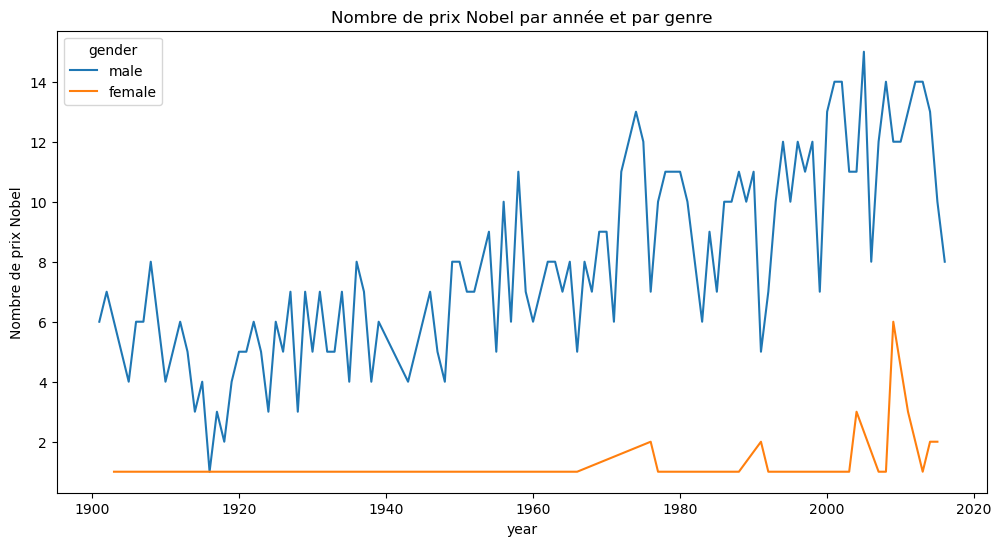

In [12]:
nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=nobel_counts, x='year', y='count', hue='gender')

plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel par année et par genre')
plt.show()

# Pays

# nombre de femmes en fonction des Pays

In [13]:
count_country= nobel_df['country'].value_counts()

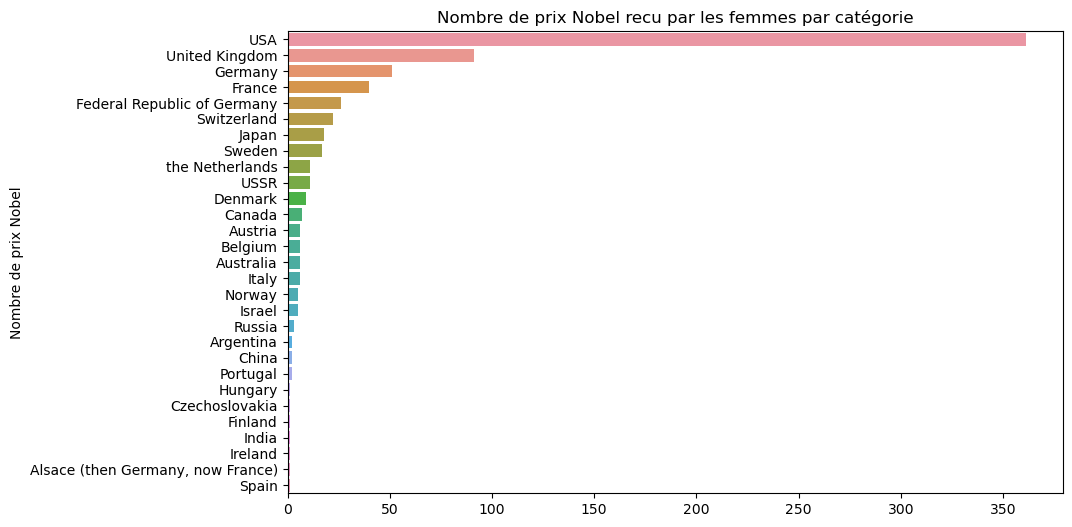

In [14]:
filtered_female = nobel_df[(nobel_df['gender'] == 'female')]
plt.figure(figsize=(10, 6))  
sns.barplot(data=filtered_female, y=count_country.index,x=count_country.values)

plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel recu par les femmes par catégorie')
plt.show()

Dans quels pays les pays ont été le plus récompenser les femmes

# Pays plus fort 

We check the data associated with the countries to make sure that all the data is correct.

In [15]:
all_country= nobel_df["country"].unique()
nobel_df[['country']].describe()
count_country= nobel_df[["country"]].value_counts()

In [16]:
nobel_counts =list(count_country.values)
print(nobel_counts)
len(nobel_counts)

[361, 91, 51, 40, 26, 22, 18, 17, 11, 11, 9, 7, 6, 6, 6, 6, 5, 5, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


29

In [17]:
name_country= list(count_country.index)
print(name_country)
len(name_country)

[('USA',), ('United Kingdom',), ('Germany',), ('France',), ('Federal Republic of Germany',), ('Switzerland',), ('Japan',), ('Sweden',), ('USSR',), ('the Netherlands',), ('Denmark',), ('Canada',), ('Belgium',), ('Austria',), ('Italy',), ('Australia',), ('Israel',), ('Norway',), ('Russia',), ('China',), ('Argentina',), ('Portugal',), ('Alsace (then Germany, now France)',), ('Spain',), ('Ireland',), ('Hungary',), ('Finland',), ('Czechoslovakia',), ('India',)]


29

C:\Users\shire\AppData\Local\Temp\ipykernel_1268\570339738.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\shire\AppData\Local\Temp\ipykernel_1268\570339738.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


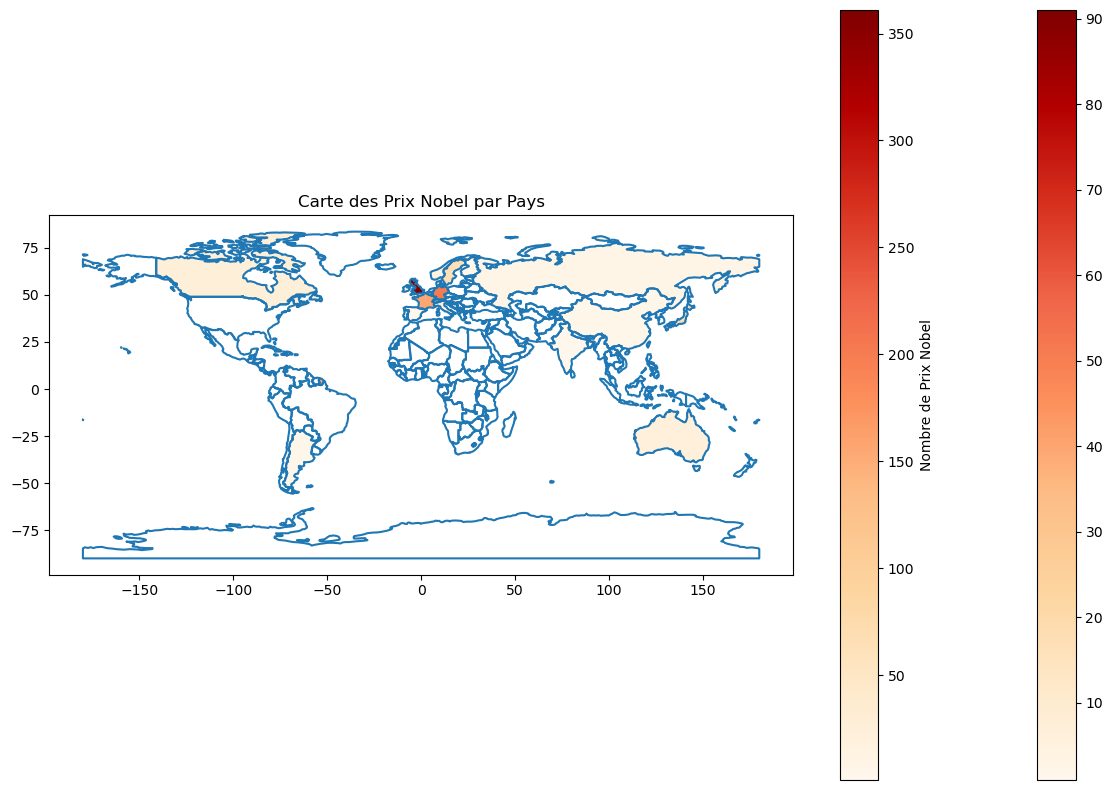

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données géographiques mondiales
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer un DataFrame avec les noms des pays et le nombre de prix Nobel
df_counts = pd.DataFrame({
    'country': name_country,
    'nobel_count': nobel_counts
})

# Assurer que les noms de pays sont uniques
df_counts['country'] = df_counts['country'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Fusionner les données géographiques avec les données sur les prix Nobel
world = world.merge(df_counts, left_on='name', right_on='country', how='left')

# Tracer la carte
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='nobel_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurer la colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=df_counts['nobel_count'].min(), vmax=df_counts['nobel_count'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Nombre de Prix Nobel')

# Ajouter un titre
plt.title('Carte des Prix Nobel par Pays')

# Afficher le graphique
plt.show()




On voit quel sont les pays les plus fort 

# Les femmes avant et apres 1980

In [19]:
female= nobel_df[nobel_df['gender'] == 'female']

In [20]:
before1980= len(nobel_df[(nobel_df['gender'] == 'female')&(nobel_df["year"] <= 1980)])
after1980= len(nobel_df[(nobel_df['gender'] == 'female')&(nobel_df["year"] >= 1980)])

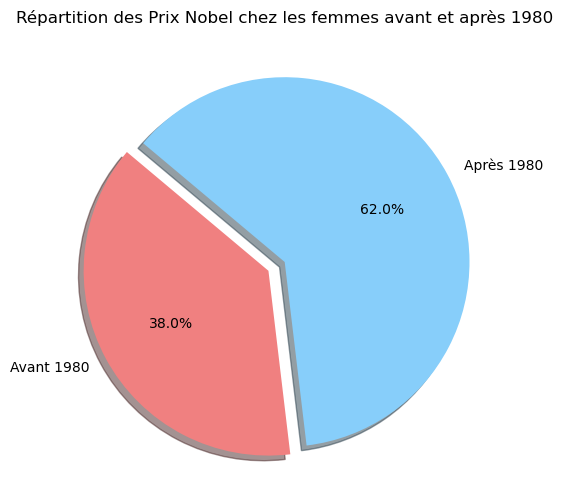

In [21]:
labels = ['Avant 1980', 'Après 1980']
sizes = [before1980, after1980]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Répartition des Prix Nobel chez les femmes avant et après 1980')
plt.show()

on peux donc constater que y'a plus de femme qui ont recu des prix nobel après 1980

# Conclusion du point

# Category-Age

In [22]:
nobel_df[["born"]].dtypes

born    object
dtype: object

In [23]:
nobel_df['born'] = pd.to_datetime(nobel_df['born'], format='%d/%m/%Y', errors='coerce')

In [24]:
nobel_df[['born']].dtypes

born    datetime64[ns]
dtype: object

In [25]:
nobel_df["bornyear"] = pd.DatetimeIndex(nobel_df['born']).year.astype('Int64')

In [26]:
nobel_df['year'] = pd.to_numeric(nobel_df['year'], errors='coerce')
nobel_df['bornyear'] = pd.to_numeric(nobel_df['bornyear'], errors='coerce')
nobel_df["category"].unique()

array(['economics', 'peace', 'chemistry', 'medicine', 'literature',
       'physics', nan], dtype=object)

<Axes: xlabel='category', ylabel='age'>

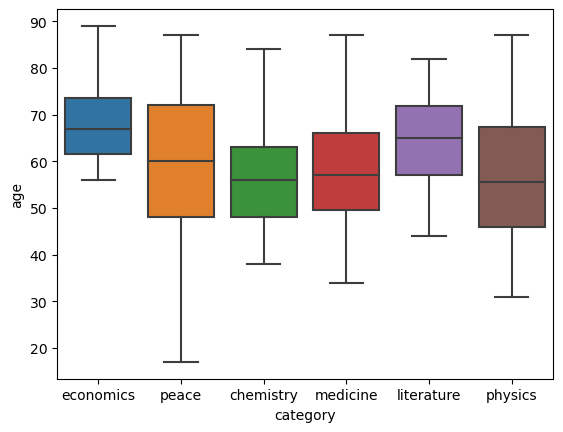

In [27]:
nobel_df['age'] = (nobel_df['year'] - nobel_df['bornyear'])
sns.boxplot(x='category', y='age', data=nobel_df)

We can therefore see that the age range varies according to category.we also observe that it is older people who win prizes. it starts at the age of 50. 

# Age-Decade

In [28]:
nobel_df_year_age = nobel_df[nobel_df['year'].notna() & nobel_df['age'].notna()]

C:\Users\shire\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shire\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


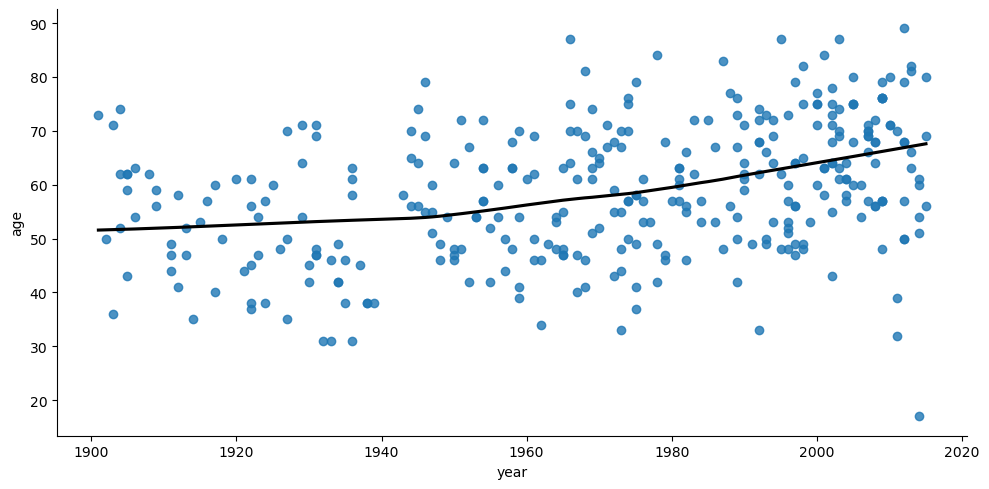

In [29]:
sns.lmplot(x='year', y='age', data=nobel_df_year_age , lowess=True, aspect=2, line_kws={'color': 'black'})

# Motivation

Quels sont les mots qui revinnent le plus 

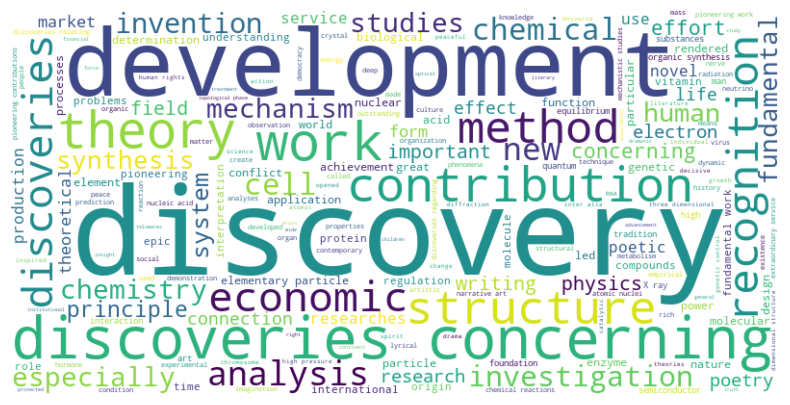

In [30]:
text = ' '.join(nobel_df['motivation'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Brouillon a verifier

In [31]:
count_gender= nobel_df['gender'].value_counts()
count_gender

gender
male      896
female     50
org        26
Name: count, dtype: int64

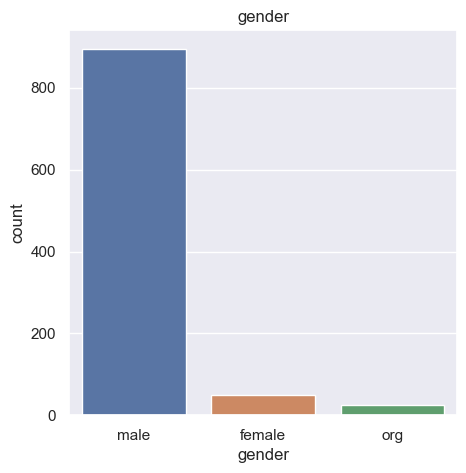

In [32]:
sns.set()
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylabel("Number of Nobel awards")
ax.set_title("gender")
sns.barplot( x = count_gender.index, y = count_gender);
plt.show()

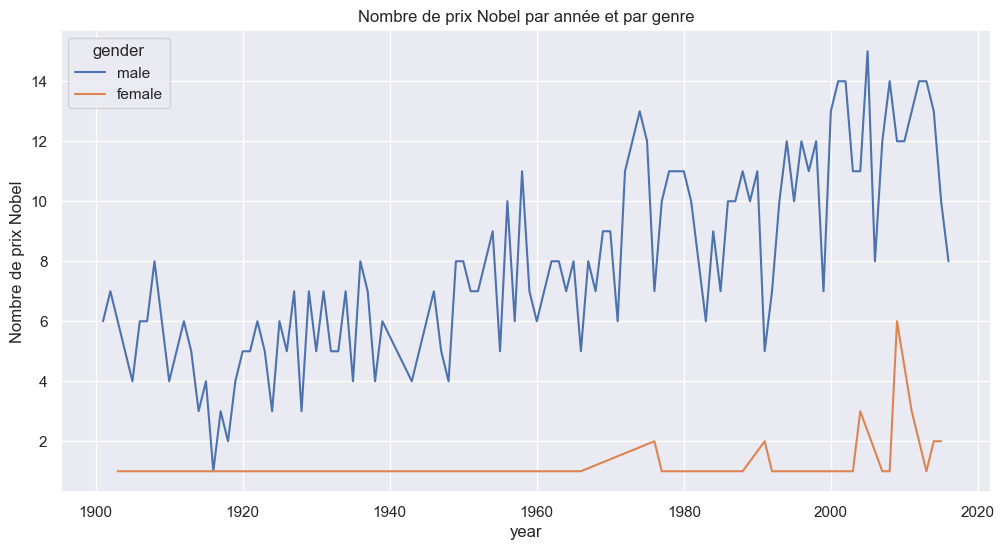

In [33]:
nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=nobel_counts, x='year', y='count', hue='gender')

plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel par année et par genre')
plt.show()

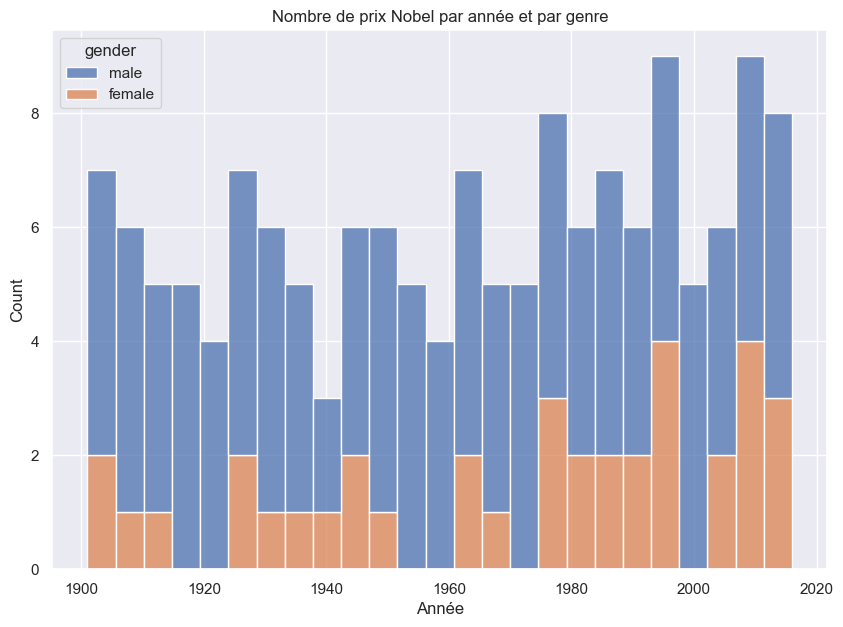

In [34]:
filter_gender = nobel_df[(nobel_df['gender'] == 'male') | (nobel_df['gender'] == 'female')]

nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(10,7))
sns.histplot(data=nobel_counts, x='year', hue='gender', multiple = 'stack',bins= 25)
plt.xlabel('Année')
plt.title('Nombre de prix Nobel par année et par genre')
plt.show()

In [35]:
flights_wide = (
    sns.load_dataset("flights")
    .pivot(index="year", columns="month", values="passengers")

sns.relplot(data=flights_wide, kind="line")

SyntaxError: '(' was never closed (3160879011.py, line 1)

In [ ]:
sns.relplot(data=flights_wide, kind="line")

C:\Users\shire\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shire\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


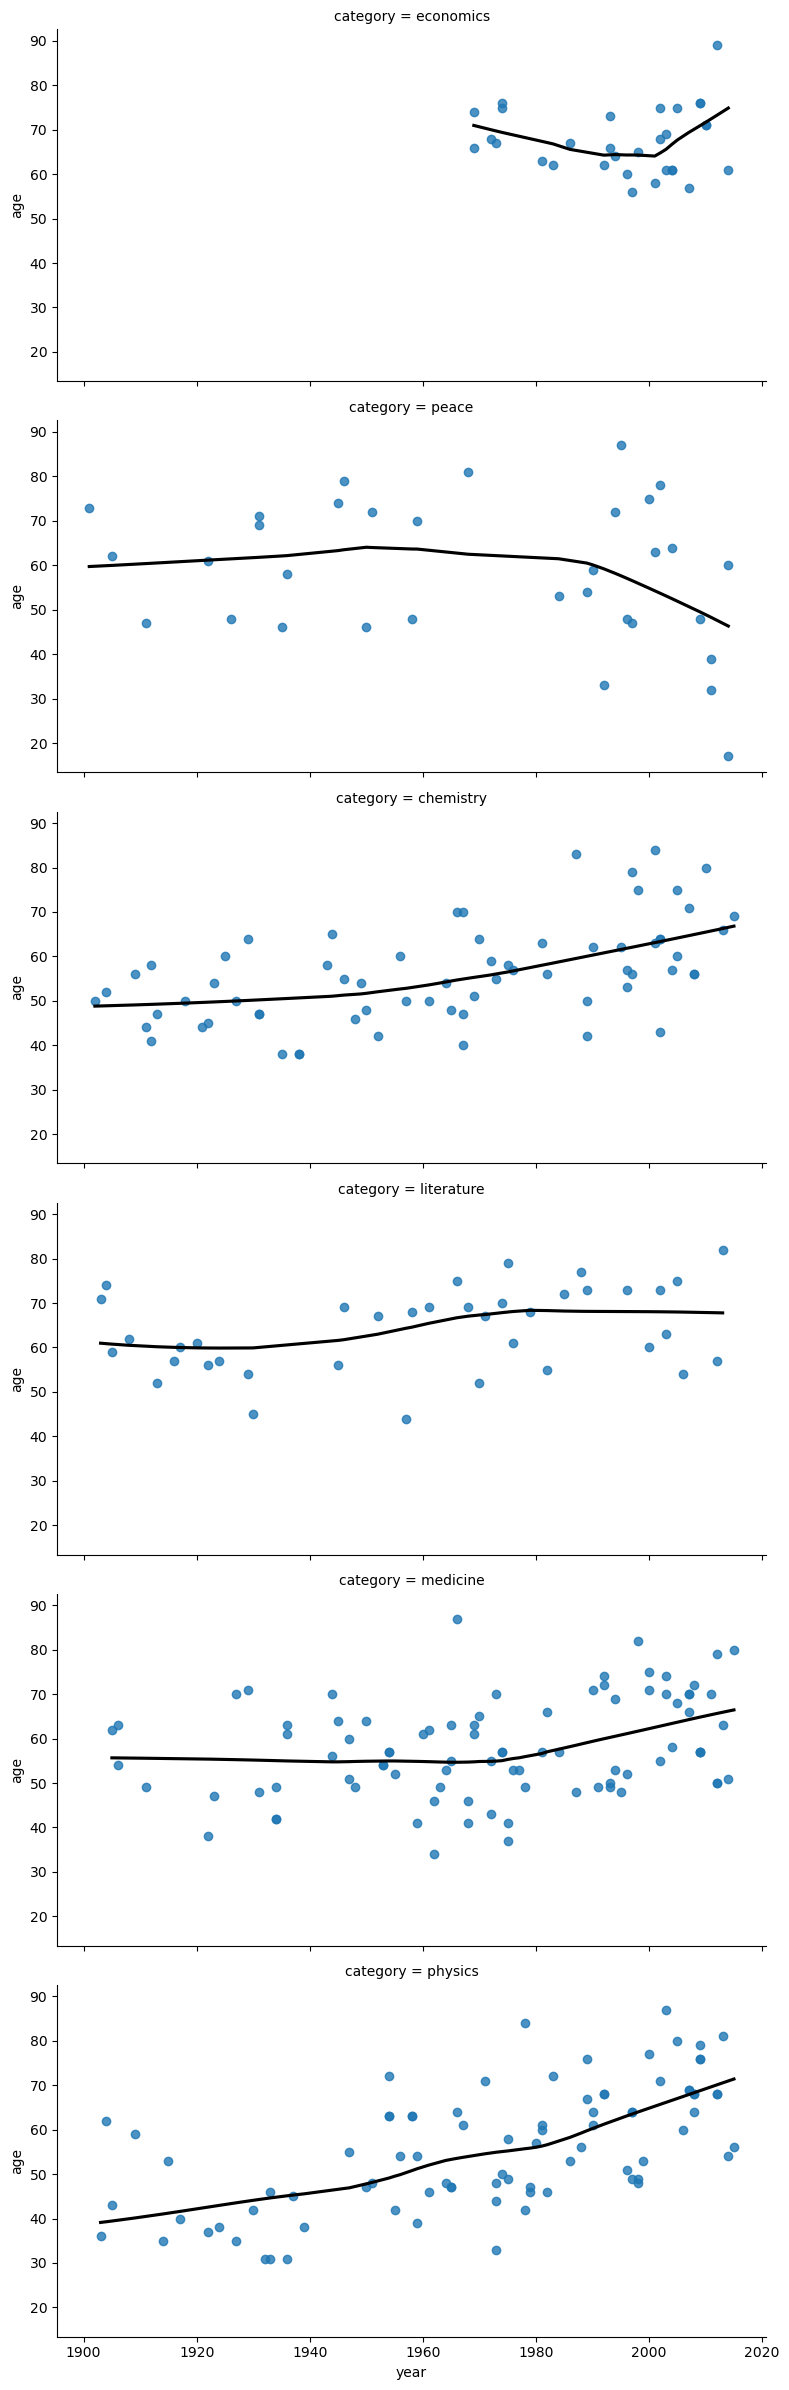

In [32]:
sns.lmplot(x='year', y='age', data=nobel_df_year_age, lowess=True, aspect=2, line_kws={'color': 'black'}, row="category", height=4)